In [1]:
# Generate sample data
import numpy as np
state = np.random.RandomState(51423)
data = 2 * (state.rand(100, 5) - 0.5).cumsum(axis=0)

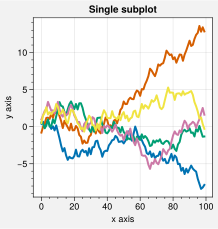

In [2]:
# Single subplot
import proplot as plot
fig, ax = plot.subplots()
ax.plot(data, lw=2)
ax.format(suptitle='Single subplot', xlabel='x axis', ylabel='y axis')

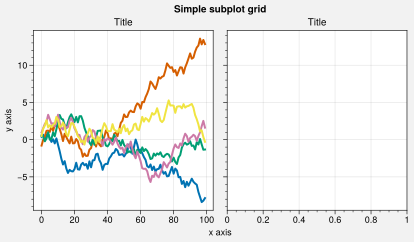

In [3]:
# Simple subplot grid
import proplot as plot
fig, axs = plot.subplots(ncols=2)
axs[0].plot(data, lw=2)
axs[0].format(xticks=20, xtickminor=False)
axs.format(
    suptitle='Simple subplot grid', title='Title',
    xlabel='x axis', ylabel='y axis'
)

(<matplotlib.lines.Line2D at 0x7f3d8e5ed400>,
 <matplotlib.lines.Line2D at 0x7f3d8e5f5100>)

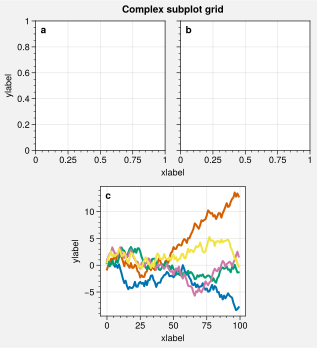

In [4]:
# Complex grid
import proplot as plot
array = [  # the "picture" (0 == nothing, 1 == subplot A, 2 == subplot B, etc.)
    [1, 1, 2, 2],
    [0, 3, 3, 0],
]
fig, axs = plot.subplots(array, refwidth=1.8)
axs.format(
    abc=True, abcloc='ul', suptitle='Complex subplot grid',
    xlabel='xlabel', ylabel='ylabel'
)
axs[2].plot(data, lw=2)

(<matplotlib.lines.Line2D at 0x7f3d8c3c9f70>,
 <matplotlib.lines.Line2D at 0x7f3d8c3cbeb0>)

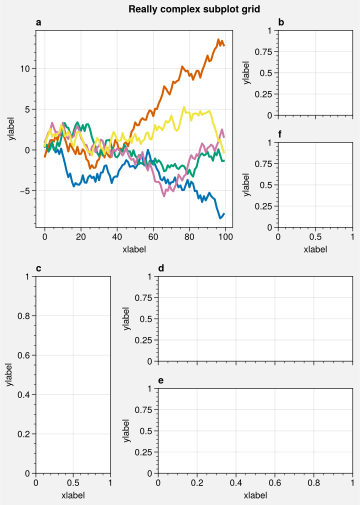

In [5]:
# Really complex grid
import proplot as plot
array = [  # the "picture" (1 == subplot A, 2 == subplot B, etc.)
    [1, 1, 2],
    [1, 1, 6],
    [3, 4, 4],
    [3, 5, 5],
]
fig, axs = plot.subplots(array, figwidth=5, span=False)
axs.format(
    suptitle='Really complex subplot grid',
    xlabel='xlabel', ylabel='ylabel', abc=True
)
axs[0].plot(data, lw=2)

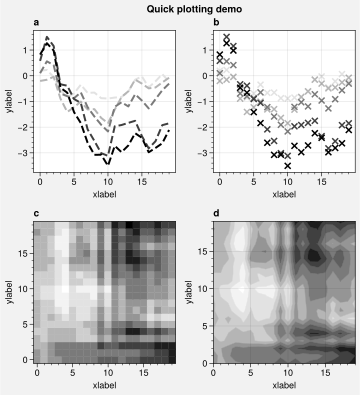

In [6]:
import proplot as plot
import numpy as np

# Sample data
N = 20
state = np.random.RandomState(51423)
data = (state.rand(N, N) - 0.5).cumsum(axis=0).cumsum(axis=1)

# Example plots
cycle = plot.Cycle('greys', left=0.2, N=5)
fig, axs = plot.subplots(ncols=2, nrows=2, figwidth=5, share=0)
axs[0].plot(data[:, :5], linewidth=2, linestyle='--', cycle=cycle)
axs[1].scatter(data[:, :5], marker='x', cycle=cycle)
axs[2].pcolormesh(data, cmap='greys')
axs[3].contourf(data, cmap='greys')
axs.format(abc=True, xlabel='xlabel', ylabel='ylabel', suptitle='Quick plotting demo')

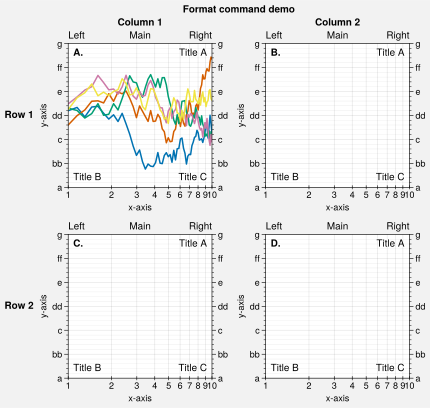

In [7]:
import proplot as plot
import numpy as np
fig, axs = plot.subplots(ncols=2, nrows=2, share=0, tight=True, refwidth=2)
state = np.random.RandomState(51423)
N = 60
x = np.linspace(1, 10, N)
y = (state.rand(N, 5) - 0.5).cumsum(axis=0)
axs[0].plot(x, y, linewidth=1.5)
axs.format(
    suptitle='Format command demo',
    abc=True, abcloc='ul', abcstyle='A.',
    title='Main', ltitle='Left', rtitle='Right',  # different titles
    urtitle='Title A', lltitle='Title B', lrtitle='Title C',  # extra titles
    toplabels=('Column 1', 'Column 2'),
    leftlabels=('Row 1', 'Row 2'),
    xlabel='x-axis', ylabel='y-axis',
    xscale='log',
    xlim=(1, 10), xticks=1,
    ylim=(-3, 3), yticks=plot.arange(-3, 3),
    yticklabels=('a', 'bb', 'c', 'dd', 'e', 'ff', 'g'),
    ytickloc='both', yticklabelloc='both',
    xtickdir='inout', xtickminor=False, ygridminor=True,
)

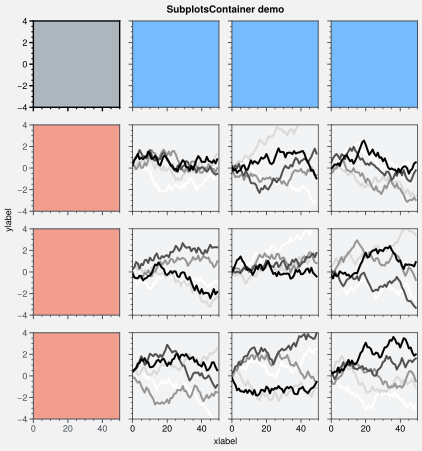

In [8]:
import proplot as plot
import numpy as np
state = np.random.RandomState(51423)
fig, axs = plot.subplots(ncols=4, nrows=4, refwidth=1.2)
axs.format(
    xlabel='xlabel', ylabel='ylabel', suptitle='SubplotsContainer demo',
    grid=False, xlim=(0, 50), ylim=(-4, 4)
)

# Various ways to select subplots in the container
axs[:, 0].format(facecolor='blush', color='gray7', linewidth=1)
axs[0, :].format(facecolor='sky blue', color='gray7', linewidth=1)
axs[0].format(color='black', facecolor='gray5', linewidth=1.4)
axs[1:, 1:].format(facecolor='gray1')
for ax in axs[1:, 1:]:
    ax.plot((state.rand(50, 5) - 0.5).cumsum(axis=0), cycle='Grays', lw=2)

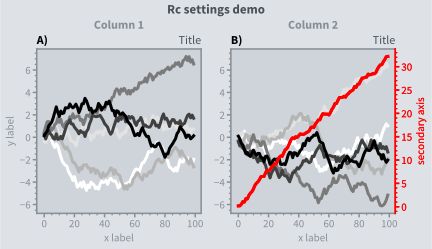

In [9]:
import proplot as plot
import numpy as np

# Update global settings in several different ways
plot.rc.cycle = 'colorblind'
plot.rc.color = 'gray6'
plot.rc.update({'fontname': 'Source Sans Pro', 'fontsize': 11})
plot.rc['figure.facecolor'] = 'gray3'
plot.rc.axesfacecolor = 'gray4'
# plot.rc.save()  # save the current settings to ~/.proplotrc

# Apply settings to figure with context()
with plot.rc.context({'suptitle.size': 13}, toplabelcolor='gray6', linewidth=1.5):
    fig, axs = plot.subplots(ncols=2, figwidth=6, sharey=2, span=False)

# Plot lines
N, M = 100, 6
state = np.random.RandomState(51423)
values = np.arange(1, M + 1)
for i, ax in enumerate(axs):
    data = np.cumsum(state.rand(N, M) - 0.5, axis=0)
    lines = ax.plot(data, linewidth=3, cycle='Grays')

# Apply settings to axes with format()
axs.format(
    grid=False, xlabel='x label', ylabel='y label',
    toplabels=('Column 1', 'Column 2'),
    suptitle='Rc settings demo',
    suptitlecolor='gray7',
    abc=True, abcloc='l', abcstyle='A)',
    title='Title', titleloc='r', titlecolor='gray7'
)
ay = axs[-1].twinx()
ay.format(ycolor='red', linewidth=1.5, ylabel='secondary axis')
ay.plot((state.rand(100) - 0.2).cumsum(), color='r', lw=3)

# Reset persistent modifications from head of cell
plot.rc.reset()

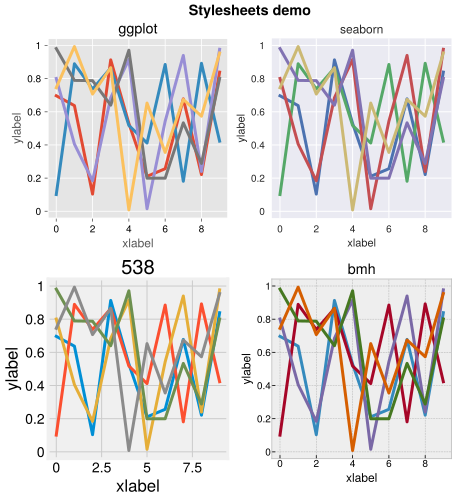

In [10]:
import proplot as plot
import numpy as np
# plot.rc.style = 'style'  # set the style everywhere

# Set up figure
styles = ('ggplot', 'seaborn', '538', 'bmh')
state = np.random.RandomState(51423)
data = state.rand(10, 5)
fig, axs = plot.subplots(ncols=2, nrows=2, span=False, share=False)

# Apply different styles to different axes with format()
axs.format(suptitle='Stylesheets demo')
for ax, style in zip(axs, styles):
    ax.format(style=style, xlabel='xlabel', ylabel='ylabel', title=style)
    ax.plot(data, linewidth=3)